In [280]:
# pip install .\TA_Lib-0.4.21-cp38-cp38-win_amd64.whl


In [281]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300

In [282]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

seed =1234

In [283]:
pd.set_option('display.max_rows', 10, 'display.max_columns', 500, 'max_colwidth', None)


In [284]:
# df = pd.read_csv('./kospi.csv')
df = pd.read_csv('./train_multivar.csv')

df.shape

(4532, 52)

In [285]:
df.head()

,Unnamed: 0,train_portfolio,HV,MA5,MA20,MA60,MA120,MA5_gra,MA20_gra,MA60_gra,MA120_gra,V_MA5,V_MA20,V_MA60,V_MA120,EMA5,EMA20,EMA60,EMA120,MACD,MACD_sig9,MACD_OSC,Fast%K,Fast%D,Slow%K,Slow%D,RSI14,RSI signal,CCI,A_Ratio,B_Ratio,ATR,UpDI,DownDI,MFI,Momentum,Sonar,Sonar_sig5,STDEV,Sigma,TRIX,VR,WILLR,Psy,Disparity20,Disparity60,ADX,ADOSC,Volume_OSC,upperband,middleband,lowerband
0,2003-09-29,100.000000,0.000000,42.146220,42.842343,0.0,0.0,-0.003142,-0.000810,0.0,0.0,3.822771e+07,3.386586e+07,0.0,0.0,42.147810,42.477200,0.0,0.0,0.115162,0.362327,-0.247165,-372.336735,-397.843003,-442.619259,-470.122753,40.902369,46.689393,-113.005039,82.720811,-108.532695,15.995005,1.485662,2.240238,39.719839,-0.708048,-0.468855,-0.132597,0.612124,-1.225263,0.065066,83.958058,-472.336735,38.250,97.591746,0.0,18.762568,-3.909975e+09,0.484744,44.066591,42.842343,41.618094
1,2003-09-30,98.666182,0.047346,41.847139,42.769253,0.0,0.0,-0.007730,-0.002238,0.0,0.0,4.313977e+07,3.470818e+07,0.0,0.0,41.951511,42.389744,0.0,0.0,0.033482,0.296558,-0.263076,-350.208606,-371.826412,-410.228485,-442.135899,41.404961,45.631836,-120.113960,72.439129,-108.628217,15.947272,1.391601,2.276410,40.754491,-1.214182,-0.717707,-0.327634,0.669573,-1.742629,0.029091,61.175908,-450.208606,28.250,96.506009,0.0,19.247360,-4.059619e+09,4.466314,44.108399,42.769253,41.430107
2,2003-10-01,101.496201,0.114521,41.927371,42.740050,0.0,0.0,0.002179,-0.000942,0.0,0.0,4.484279e+07,3.536592e+07,0.0,0.0,42.159341,42.407388,0.0,0.0,0.050162,0.247279,-0.197117,-324.533872,-349.026404,-373.654298,-408.834014,47.815303,46.068751,-42.830928,83.965633,-108.920230,15.999634,1.783344,2.099806,44.213528,-0.000695,-0.808813,-0.488027,0.667283,-0.226971,0.004674,68.210780,-424.533872,37.875,99.353204,0.0,18.627031,-4.085364e+09,8.823151,44.074615,42.740050,41.405484
3,2003-10-02,102.256298,0.116916,42.126826,42.717888,0.0,0.0,0.005389,-0.000766,0.0,0.0,4.280619e+07,3.591528e+07,0.0,0.0,42.374366,42.445200,0.0,0.0,0.080959,0.214015,-0.133056,-315.254148,-329.998875,-351.053451,-378.312078,49.982234,46.851766,4.260170,83.953248,-108.931288,16.000053,1.962065,1.947122,48.765715,-0.577865,-0.772461,-0.582838,0.660252,0.099214,-0.008534,70.947579,-415.254148,40.125,100.166140,0.0,17.712021,-4.208542e+09,8.880720,44.038391,42.717888,41.397384
4,2003-10-03,104.068600,0.130730,42.477221,42.737590,0.0,0.0,0.009944,0.000424,0.0,0.0,4.357655e+07,3.650078e+07,0.0,0.0,42.711793,42.534862,0.0,0.0,0.150611,0.201334,-0.050723,-295.685218,-311.824413,-331.603716,-352.103822,55.713842,48.624756,76.695132,85.928471,-108.888584,16.064215,2.546638,1.794159,51.903949,0.114617,-0.492232,-0.552636,0.671957,0.955624,-0.007620,86.588038,-395.685218,49.500,101.891170,0.0,17.789960,-4.319474e+09,9.854309,44.081504,42.737590,41.393676


In [286]:
df.isna().sum()

Unnamed: 0         0
train_portfolio    0
HV                 0
MA5                0
MA20               0
                  ..
ADOSC              0
Volume_OSC         0
upperband          0
middleband         0
lowerband          0
Length: 52, dtype: int64

In [287]:
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [288]:
df.head()

,Date,train_portfolio,HV,MA5,MA20,MA60,MA120,MA5_gra,MA20_gra,MA60_gra,MA120_gra,V_MA5,V_MA20,V_MA60,V_MA120,EMA5,EMA20,EMA60,EMA120,MACD,MACD_sig9,MACD_OSC,Fast%K,Fast%D,Slow%K,Slow%D,RSI14,RSI signal,CCI,A_Ratio,B_Ratio,ATR,UpDI,DownDI,MFI,Momentum,Sonar,Sonar_sig5,STDEV,Sigma,TRIX,VR,WILLR,Psy,Disparity20,Disparity60,ADX,ADOSC,Volume_OSC,upperband,middleband,lowerband
0,2003-09-29,100.000000,0.000000,42.146220,42.842343,0.0,0.0,-0.003142,-0.000810,0.0,0.0,3.822771e+07,3.386586e+07,0.0,0.0,42.147810,42.477200,0.0,0.0,0.115162,0.362327,-0.247165,-372.336735,-397.843003,-442.619259,-470.122753,40.902369,46.689393,-113.005039,82.720811,-108.532695,15.995005,1.485662,2.240238,39.719839,-0.708048,-0.468855,-0.132597,0.612124,-1.225263,0.065066,83.958058,-472.336735,38.250,97.591746,0.0,18.762568,-3.909975e+09,0.484744,44.066591,42.842343,41.618094
1,2003-09-30,98.666182,0.047346,41.847139,42.769253,0.0,0.0,-0.007730,-0.002238,0.0,0.0,4.313977e+07,3.470818e+07,0.0,0.0,41.951511,42.389744,0.0,0.0,0.033482,0.296558,-0.263076,-350.208606,-371.826412,-410.228485,-442.135899,41.404961,45.631836,-120.113960,72.439129,-108.628217,15.947272,1.391601,2.276410,40.754491,-1.214182,-0.717707,-0.327634,0.669573,-1.742629,0.029091,61.175908,-450.208606,28.250,96.506009,0.0,19.247360,-4.059619e+09,4.466314,44.108399,42.769253,41.430107
2,2003-10-01,101.496201,0.114521,41.927371,42.740050,0.0,0.0,0.002179,-0.000942,0.0,0.0,4.484279e+07,3.536592e+07,0.0,0.0,42.159341,42.407388,0.0,0.0,0.050162,0.247279,-0.197117,-324.533872,-349.026404,-373.654298,-408.834014,47.815303,46.068751,-42.830928,83.965633,-108.920230,15.999634,1.783344,2.099806,44.213528,-0.000695,-0.808813,-0.488027,0.667283,-0.226971,0.004674,68.210780,-424.533872,37.875,99.353204,0.0,18.627031,-4.085364e+09,8.823151,44.074615,42.740050,41.405484
3,2003-10-02,102.256298,0.116916,42.126826,42.717888,0.0,0.0,0.005389,-0.000766,0.0,0.0,4.280619e+07,3.591528e+07,0.0,0.0,42.374366,42.445200,0.0,0.0,0.080959,0.214015,-0.133056,-315.254148,-329.998875,-351.053451,-378.312078,49.982234,46.851766,4.260170,83.953248,-108.931288,16.000053,1.962065,1.947122,48.765715,-0.577865,-0.772461,-0.582838,0.660252,0.099214,-0.008534,70.947579,-415.254148,40.125,100.166140,0.0,17.712021,-4.208542e+09,8.880720,44.038391,42.717888,41.397384
4,2003-10-03,104.068600,0.130730,42.477221,42.737590,0.0,0.0,0.009944,0.000424,0.0,0.0,4.357655e+07,3.650078e+07,0.0,0.0,42.711793,42.534862,0.0,0.0,0.150611,0.201334,-0.050723,-295.685218,-311.824413,-331.603716,-352.103822,55.713842,48.624756,76.695132,85.928471,-108.888584,16.064215,2.546638,1.794159,51.903949,0.114617,-0.492232,-0.552636,0.671957,0.955624,-0.007620,86.588038,-395.685218,49.500,101.891170,0.0,17.789960,-4.319474e+09,9.854309,44.081504,42.737590,41.393676


In [289]:
df.set_index('Date', inplace=True)

In [290]:
df.head()

,train_portfolio,HV,MA5,MA20,MA60,MA120,MA5_gra,MA20_gra,MA60_gra,MA120_gra,V_MA5,V_MA20,V_MA60,V_MA120,EMA5,EMA20,EMA60,EMA120,MACD,MACD_sig9,MACD_OSC,Fast%K,Fast%D,Slow%K,Slow%D,RSI14,RSI signal,CCI,A_Ratio,B_Ratio,ATR,UpDI,DownDI,MFI,Momentum,Sonar,Sonar_sig5,STDEV,Sigma,TRIX,VR,WILLR,Psy,Disparity20,Disparity60,ADX,ADOSC,Volume_OSC,upperband,middleband,lowerband
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-09-29,100.000000,0.000000,42.146220,42.842343,0.0,0.0,-0.003142,-0.000810,0.0,0.0,3.822771e+07,3.386586e+07,0.0,0.0,42.147810,42.477200,0.0,0.0,0.115162,0.362327,-0.247165,-372.336735,-397.843003,-442.619259,-470.122753,40.902369,46.689393,-113.005039,82.720811,-108.532695,15.995005,1.485662,2.240238,39.719839,-0.708048,-0.468855,-0.132597,0.612124,-1.225263,0.065066,83.958058,-472.336735,38.250,97.591746,0.0,18.762568,-3.909975e+09,0.484744,44.066591,42.842343,41.618094
2003-09-30,98.666182,0.047346,41.847139,42.769253,0.0,0.0,-0.007730,-0.002238,0.0,0.0,4.313977e+07,3.470818e+07,0.0,0.0,41.951511,42.389744,0.0,0.0,0.033482,0.296558,-0.263076,-350.208606,-371.826412,-410.228485,-442.135899,41.404961,45.631836,-120.113960,72.439129,-108.628217,15.947272,1.391601,2.276410,40.754491,-1.214182,-0.717707,-0.327634,0.669573,-1.742629,0.029091,61.175908,-450.208606,28.250,96.506009,0.0,19.247360,-4.059619e+09,4.466314,44.108399,42.769253,41.430107
2003-10-01,101.496201,0.114521,41.927371,42.740050,0.0,0.0,0.002179,-0.000942,0.0,0.0,4.484279e+07,3.536592e+07,0.0,0.0,42.159341,42.407388,0.0,0.0,0.050162,0.247279,-0.197117,-324.533872,-349.026404,-373.654298,-408.834014,47.815303,46.068751,-42.830928,83.965633,-108.920230,15.999634,1.783344,2.099806,44.213528,-0.000695,-0.808813,-0.488027,0.667283,-0.226971,0.004674,68.210780,-424.533872,37.875,99.353204,0.0,18.627031,-4.085364e+09,8.823151,44.074615,42.740050,41.405484
2003-10-02,102.256298,0.116916,42.126826,42.717888,0.0,0.0,0.005389,-0.000766,0.0,0.0,4.280619e+07,3.591528e+07,0.0,0.0,42.374366,42.445200,0.0,0.0,0.080959,0.214015,-0.133056,-315.254148,-329.998875,-351.053451,-378.312078,49.982234,46.851766,4.260170,83.953248,-108.931288,16.000053,1.962065,1.947122,48.765715,-0.577865,-0.772461,-0.582838,0.660252,0.099214,-0.008534,70.947579,-415.254148,40.125,100.166140,0.0,17.712021,-4.208542e+09,8.880720,44.038391,42.717888,41.397384
2003-10-03,104.068600,0.130730,42.477221,42.737590,0.0,0.0,0.009944,0.000424,0.0,0.0,4.357655e+07,3.650078e+07,0.0,0.0,42.711793,42.534862,0.0,0.0,0.150611,0.201334,-0.050723,-295.685218,-311.824413,-331.603716,-352.103822,55.713842,48.624756,76.695132,85.928471,-108.888584,16.064215,2.546638,1.794159,51.903949,0.114617,-0.492232,-0.552636,0.671957,0.955624,-0.007620,86.588038,-395.685218,49.500,101.891170,0.0,17.789960,-4.319474e+09,9.854309,44.081504,42.737590,41.393676


In [291]:
df.shape

(4532, 51)

In [292]:
cols = ['HV', 'MACD', 'MACD_OSC', 'Sonar', 'Sigma', 'Momentum', 'Volume_OSC',  'ATR','RSI signal','RSI14',  'ADOSC']
cols


['HV',
 'MACD',
 'MACD_OSC',
 'Sonar',
 'Sigma',
 'Momentum',
 'Volume_OSC',
 'ATR',
 'RSI signal',
 'RSI14',
 'ADOSC']

In [293]:
df = df[cols]

In [294]:
df.index

Index(['2003-09-29', '2003-09-30', '2003-10-01', '2003-10-02', '2003-10-03',
       '2003-10-06', '2003-10-07', '2003-10-08', '2003-10-09', '2003-10-10',
       ...
       '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-20', '2021-09-21',
       '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28'],
      dtype='object', name='Date', length=4532)

In [295]:
df.head()

,HV,MACD,MACD_OSC,Sonar,Sigma,Momentum,Volume_OSC,ATR,RSI signal,RSI14,ADOSC
Date,,,,,,,,,,,
2003-09-29,0.000000,0.115162,-0.247165,-0.468855,-1.225263,-0.708048,0.484744,15.995005,46.689393,40.902369,-3.909975e+09
2003-09-30,0.047346,0.033482,-0.263076,-0.717707,-1.742629,-1.214182,4.466314,15.947272,45.631836,41.404961,-4.059619e+09
2003-10-01,0.114521,0.050162,-0.197117,-0.808813,-0.226971,-0.000695,8.823151,15.999634,46.068751,47.815303,-4.085364e+09
2003-10-02,0.116916,0.080959,-0.133056,-0.772461,0.099214,-0.577865,8.880720,16.000053,46.851766,49.982234,-4.208542e+09
2003-10-03,0.130730,0.150611,-0.050723,-0.492232,0.955624,0.114617,9.854309,16.064215,48.624756,55.713842,-4.319474e+09


In [296]:
# df_og = scaler.inverse_transform(df)
# df_og_df = pd.DataFrame(df_og, columns = cols, index = df.index)
# df_og_df.head()

In [297]:
df.shape

(4532, 11)

In [298]:
feature_df = df.loc['2003-09-29':'2021-09-28', 'MACD':'MACD_OSC']
print(feature_df.shape)
feature_df.head()

(4532, 2)


,MACD,MACD_OSC
Date,,
2003-09-29,0.115162,-0.247165
2003-09-30,0.033482,-0.263076
2003-10-01,0.050162,-0.197117
2003-10-02,0.080959,-0.133056
2003-10-03,0.150611,-0.050723


In [299]:
label_df = df.loc['2003-09-29':'2021-09-28', 'HV']
print(label_df.shape)
label_df.head()

(4532,)


Date
2003-09-29    0.000000
2003-09-30    0.047346
2003-10-01    0.114521
2003-10-02    0.116916
2003-10-03    0.130730
Name: HV, dtype: float64

# TRAIN, TEST 분리
- 1차 : 2003 ~ 2011 학습 / 2012 ~ 2016 예측
- 2차 : 2003 ~ 2016 학습 / 2017~ 2021 예측

## 1차 train_test 분리

In [300]:
X_train_1st = feature_df.loc['2003-09-29':'2011-09-28']
print(X_train_1st.shape)
X_train_1st.head()

(2016, 2)


,MACD,MACD_OSC
Date,,
2003-09-29,0.115162,-0.247165
2003-09-30,0.033482,-0.263076
2003-10-01,0.050162,-0.197117
2003-10-02,0.080959,-0.133056
2003-10-03,0.150611,-0.050723


In [301]:
y_train_1st = label_df.loc['2003-09-29':'2011-09-28']
print(y_train_1st.shape)
y_train_1st.head()

(2016,)


Date
2003-09-29    0.000000
2003-09-30    0.047346
2003-10-01    0.114521
2003-10-02    0.116916
2003-10-03    0.130730
Name: HV, dtype: float64

### test

In [302]:
X_test_1st = feature_df.loc['2011-09-29':'2012-09-28']
print(X_test_1st.shape)
X_test_1st.head()

(253, 2)


,MACD,MACD_OSC
Date,,
2011-09-29,-0.859632,-0.076942
2011-09-30,-0.981205,-0.158812
2011-10-03,-1.202298,-0.303924
2011-10-04,-1.250259,-0.281508
2011-10-05,-1.187766,-0.175212


In [303]:
y_test_1st = label_df.loc['2011-09-29':'2012-09-28']
print(y_test_1st.shape)
y_test_1st.head()

(253,)


Date
2011-09-29    0.319239
2011-09-30    0.333242
2011-10-03    0.335976
2011-10-04    0.349794
2011-10-05    0.335999
Name: HV, dtype: float64

In [304]:
print(X_train_1st.shape, y_train_1st.shape)
print(X_test_1st.shape, y_test_1st.shape)

(2016, 2) (2016,)
(253, 2) (253,)


## scaling
X와 y를 각각 scaling 해주어야한다.

In [305]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Standardization 평균 0 / 분산 1
X_scaler = RobustScaler()
   
# df_1 = scaler.fit_transform(df)

# 교차검증시
X_scaler.fit(X_train_1st)
X_train_1st_sc = X_scaler.transform(X_train_1st)
X_test_1st_sc = X_scaler.transform(X_test_1st)

In [306]:
# from sklearn.preprocessing import StandardScaler

# # Standardization 평균 0 / 분산 1
# y_scaler = StandardScaler()   

# # df_1 = scaler.fit_transform(df)

# # 교차검증시
# y_scaler.fit(y_train_1st)
# y_train_1st_sc = y_scaler.transform(y_train_1st)
# y_test_1st_sc = y_scaler.transform(y_test_1st)

In [307]:
X_train_1st_sc.shape, X_test_1st_sc.shape, y_train_1st.shape, y_test_1st.shape

((2016, 2), (253, 2), (2016,), (253,))

In [308]:
y_train_1st.head()

Date
2003-09-29    0.000000
2003-09-30    0.047346
2003-10-01    0.114521
2003-10-02    0.116916
2003-10-03    0.130730
Name: HV, dtype: float64

In [309]:
y_test_1st.head()

Date
2011-09-29    0.319239
2011-09-30    0.333242
2011-10-03    0.335976
2011-10-04    0.349794
2011-10-05    0.335999
Name: HV, dtype: float64

In [310]:
y_test_1st.describe()

count    253.000000
mean       0.197111
std        0.080815
min        0.075724
25%        0.135765
50%        0.168431
75%        0.243954
max        0.365512
Name: HV, dtype: float64

In [311]:
# df = pd.DataFrame(df_1, columns = cols, index = df.index)

In [312]:
X_train_1st_sc_df = pd.DataFrame(X_train_1st_sc, columns =X_train_1st.columns, index = X_train_1st.index)
X_train_1st_sc_df.head()

,MACD,MACD_OSC
Date,,
2003-09-29,-0.151745,-1.002662
2003-09-30,-0.248447,-1.066484
2003-10-01,-0.228700,-0.801912
2003-10-02,-0.192238,-0.544951
2003-10-03,-0.109777,-0.214700


In [313]:
X_test_1st_sc_df = pd.DataFrame(X_test_1st_sc, columns = X_test_1st.columns, index = X_test_1st.index)
X_test_1st_sc_df.head()

,MACD,MACD_OSC
Date,,
2011-09-29,-1.305810,-0.319870
2011-09-30,-1.449742,-0.648264
2011-10-03,-1.711495,-1.230333
2011-10-04,-1.768277,-1.140419
2011-10-05,-1.694291,-0.714048


In [314]:
X_test_1st_sc_df.describe()

,MACD,MACD_OSC
count,253.000000,253.000000
mean,0.140501,0.090953
std,0.839020,0.963101
min,-1.868784,-2.916048
25%,-0.326423,-0.545101
50%,0.266370,0.118978
75%,0.841659,0.701709
max,1.379662,2.594552


In [315]:
# 딥러닝 학습을 위해 df -> numpy 변환
X_train_1st_np = X_train_1st_sc_df.to_numpy()
y_train_1st_np = y_train_1st.to_numpy()

X_test_1st_np = X_test_1st_sc_df.to_numpy()
y_test_1st_np = y_test_1st.to_numpy()

In [316]:
# 입력 파라미터 feature, label -> numpy type

def make_sequence_dataset(feature, label, window_size):
    feature_list = [] # 생성될 feature list
    label_list = []  # 생성될 label list
    
    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
    return np.array(feature_list), np.array(label_list) # 3차원으로 만들어줌

In [317]:
window_size = 20
X_train_1st, y_train_1st = make_sequence_dataset(X_train_1st_np, y_train_1st_np, window_size)
X_test_1st, y_test_1st = make_sequence_dataset(X_test_1st_np, y_test_1st_np, window_size)
print(X_train_1st.shape, y_train_1st.shape, X_test_1st.shape, y_test_1st.shape) # (batch size, time steps, input dims)

(1996, 20, 2) (1996,) (233, 20, 2) (233,)


# TRAIN, TEST 분리

In [318]:
# input_shape
X_train_1st[0].shape

(20, 2)

# Model

In [319]:
# model_116 = Sequential()
# model_116.add(LSTM(64, activation = 'relu', input_shape = X_train_1st[0].shape)) 
# # model_115.add(LSTM(16, activation = 'relu'))
# # model.add(LSTM(4, activation = 'relu',return_sequences=True))
# model_116.add(Dense(1))
# model_116.summary()

In [320]:
# Initialising the RNN
model_124 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model_124.add(GRU(units = 128, activation = 'relu',  input_shape = X_train_1st[0].shape))
model_124.add(Dropout(0.1))

# # Adding a second LSTM layer and some Dropout regularisation
# model_124.add(GRU(units = 10, activation = 'relu', return_sequences = True))
# model_124.add(Dropout(0.1))

# # Adding a third LSTM layer and some Dropout regularisation
# model_124.add(GRU(units = 10, activation = 'relu', return_sequences = True))
# model_124.add(Dropout(0.1))

# # Adding a fourth LSTM layer and some Dropout regularisation
# model_124.add(GRU(units = 10, activation = 'relu'))
# model_124.add(Dropout(0.1))

# model_124.add(SimpleRNN(10))

# Adding the output layer
model_124.add(Dense(units = 1))
model_124.summary()
# Compiling the RNN
# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 128)               50688     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50,817
Trainable params: 50,817
Non-trainable params: 0
_________________________________________________________________


In [321]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

# 출처: https://kibua20.tistory.com/206 [모바일 SW 개발자가 운영하는 블로그]
sgd = optimizers.SGD(learning_rate = 0.0001)
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_124.compile(loss = 'mse', optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'val_loss', patience = 15)
history = model_124.fit(X_train_1st, y_train_1st, validation_data = (X_test_1st, y_test_1st), epochs=100, 
          batch_size=15, callbacks = [early_stop])

Epoch 1/100
134/134 [==============================] - 3s 11ms/step - loss: 0.0087 - val_loss: 0.0071
Epoch 2/100
134/134 [==============================] - 1s 10ms/step - loss: 0.0058 - val_loss: 0.0069
Epoch 3/100
134/134 [==============================] - 1s 10ms/step - loss: 0.0045 - val_loss: 0.0069
Epoch 4/100
134/134 [==============================] - 1s 9ms/step - loss: 0.0043 - val_loss: 0.0065
Epoch 5/100
134/134 [==============================] - 1s 10ms/step - loss: 0.0039 - val_loss: 0.0085
Epoch 6/100
134/134 [==============================] - 1s 9ms/step - loss: 0.0032 - val_loss: 0.0113
Epoch 7/100
134/134 [==============================] - 1s 9ms/step - loss: 0.0036 - val_loss: 0.0063
Epoch 8/100
134/134 [==============================] - 1s 8ms/step - loss: 0.0030 - val_loss: 0.0057
Epoch 9/100
134/134 [==============================] - 1s 8ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 10/100
134/134 [==============================] - 1s 8ms/step - loss: 0.0030 - va

In [322]:
val_loss = history.history['val_loss']
print(val_loss[:5])

[0.007072733715176582, 0.006931474432349205, 0.006872315891087055, 0.006464372854679823, 0.008504576049745083]


In [323]:
train_loss = history.history['loss']
print(train_loss[:5])

[0.008749421685934067, 0.005790870636701584, 0.0045140949077904224, 0.004286948125809431, 0.0038914764299988747]


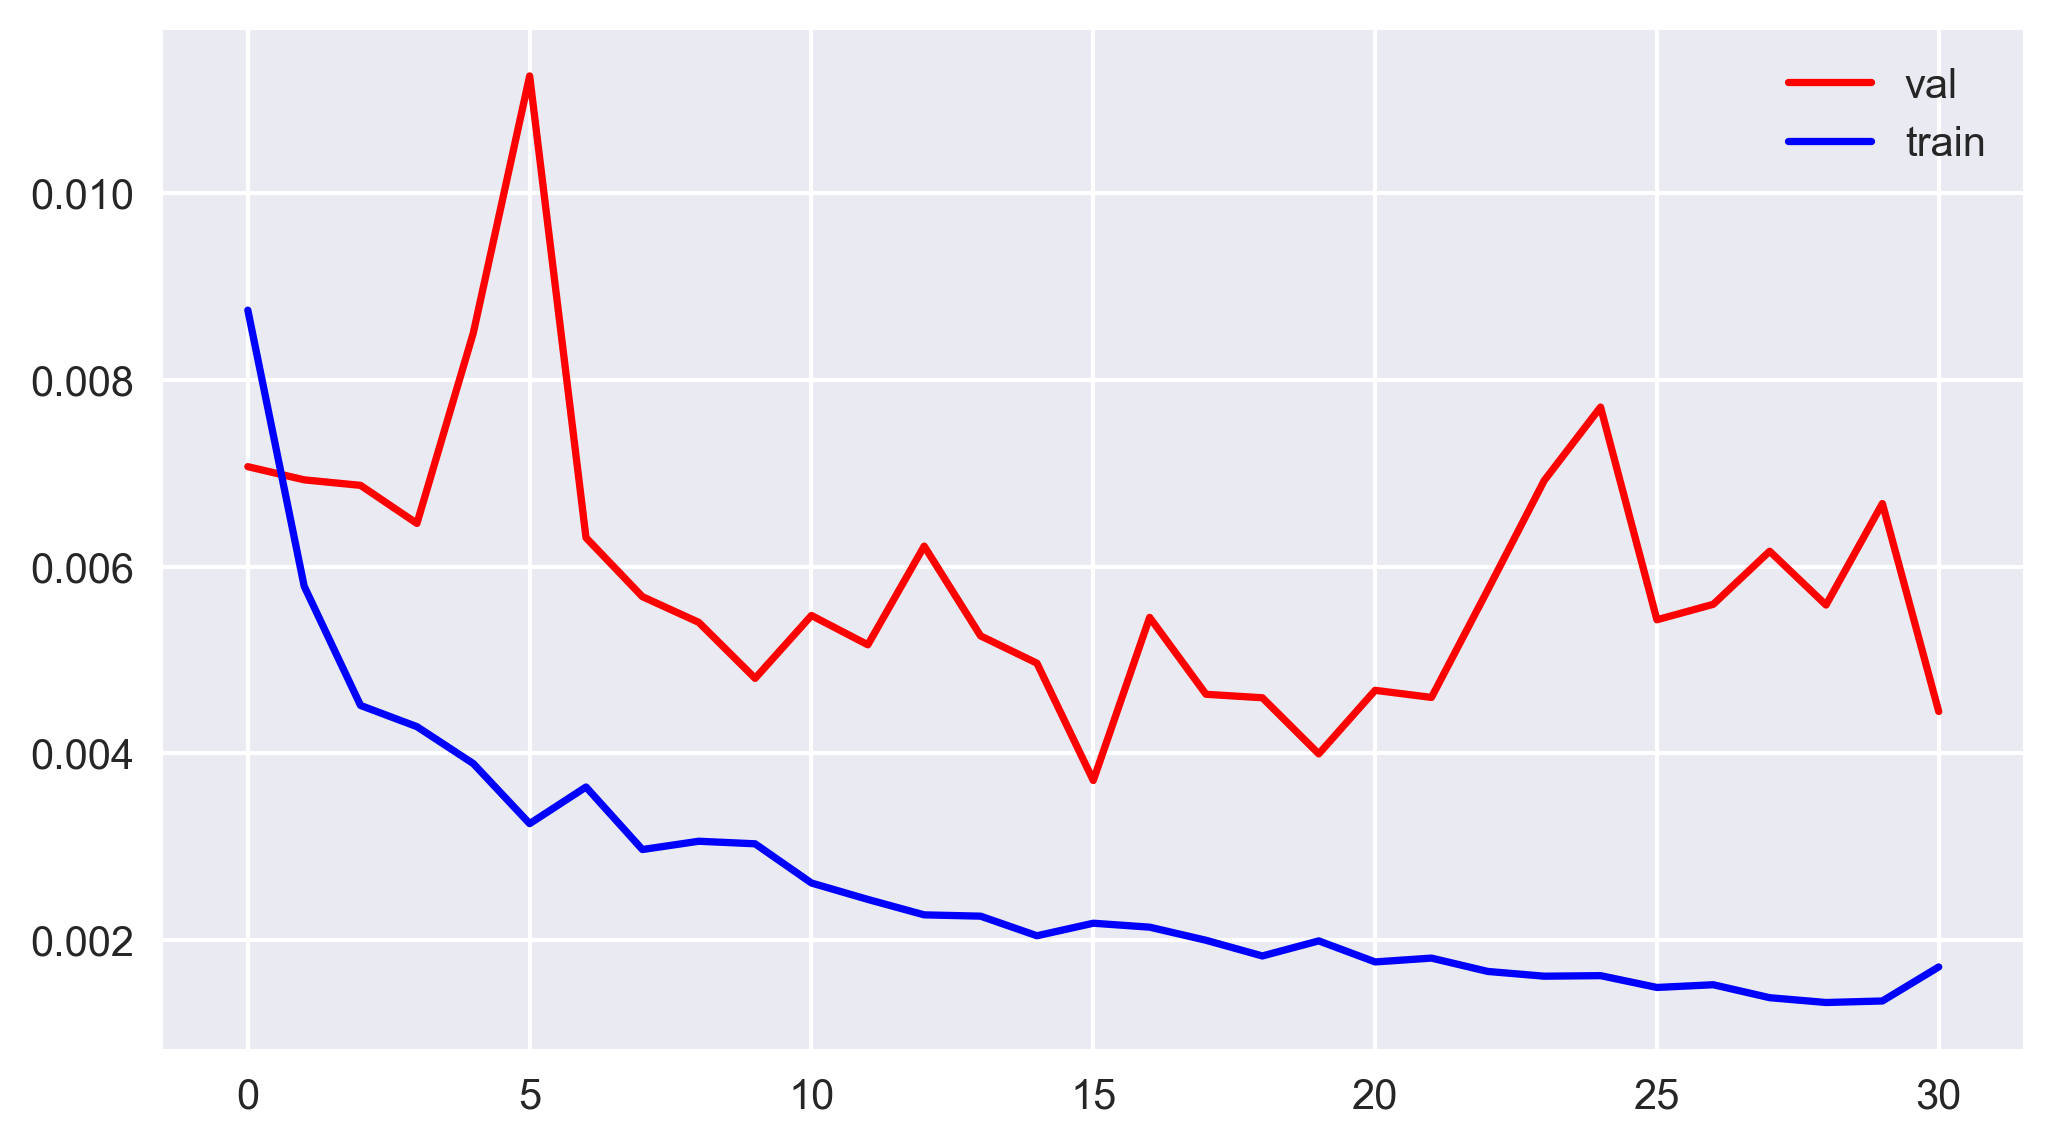

In [324]:
plt.plot(np.arange(len(val_loss)), val_loss, c="red", label='val')
plt.plot(np.arange(len(train_loss)), train_loss, c='blue', label ='train')
plt.legend()
plt.show()

# 예측 결과 시각화
- https://www.youtube.com/watch?v=LLLVYkXJw30

In [325]:
# X_test_1st[:5]

In [326]:
pred = model_124.predict(X_test_1st)

In [327]:
pred[:5]

array([[0.3921102 ],
       [0.41242778],
       [0.43353206],
       [0.42767045],
       [0.41299868]], dtype=float32)

In [328]:
np.mean(pred)

0.2153862

In [329]:
score_rmse = np.sqrt(np.mean(((pred-y_test_1st)**2)))
score_rmse

0.10893301585788852

In [330]:
y_test_1st[:5]

array([0.33806712, 0.31057565, 0.31295185, 0.32665189, 0.32628349])

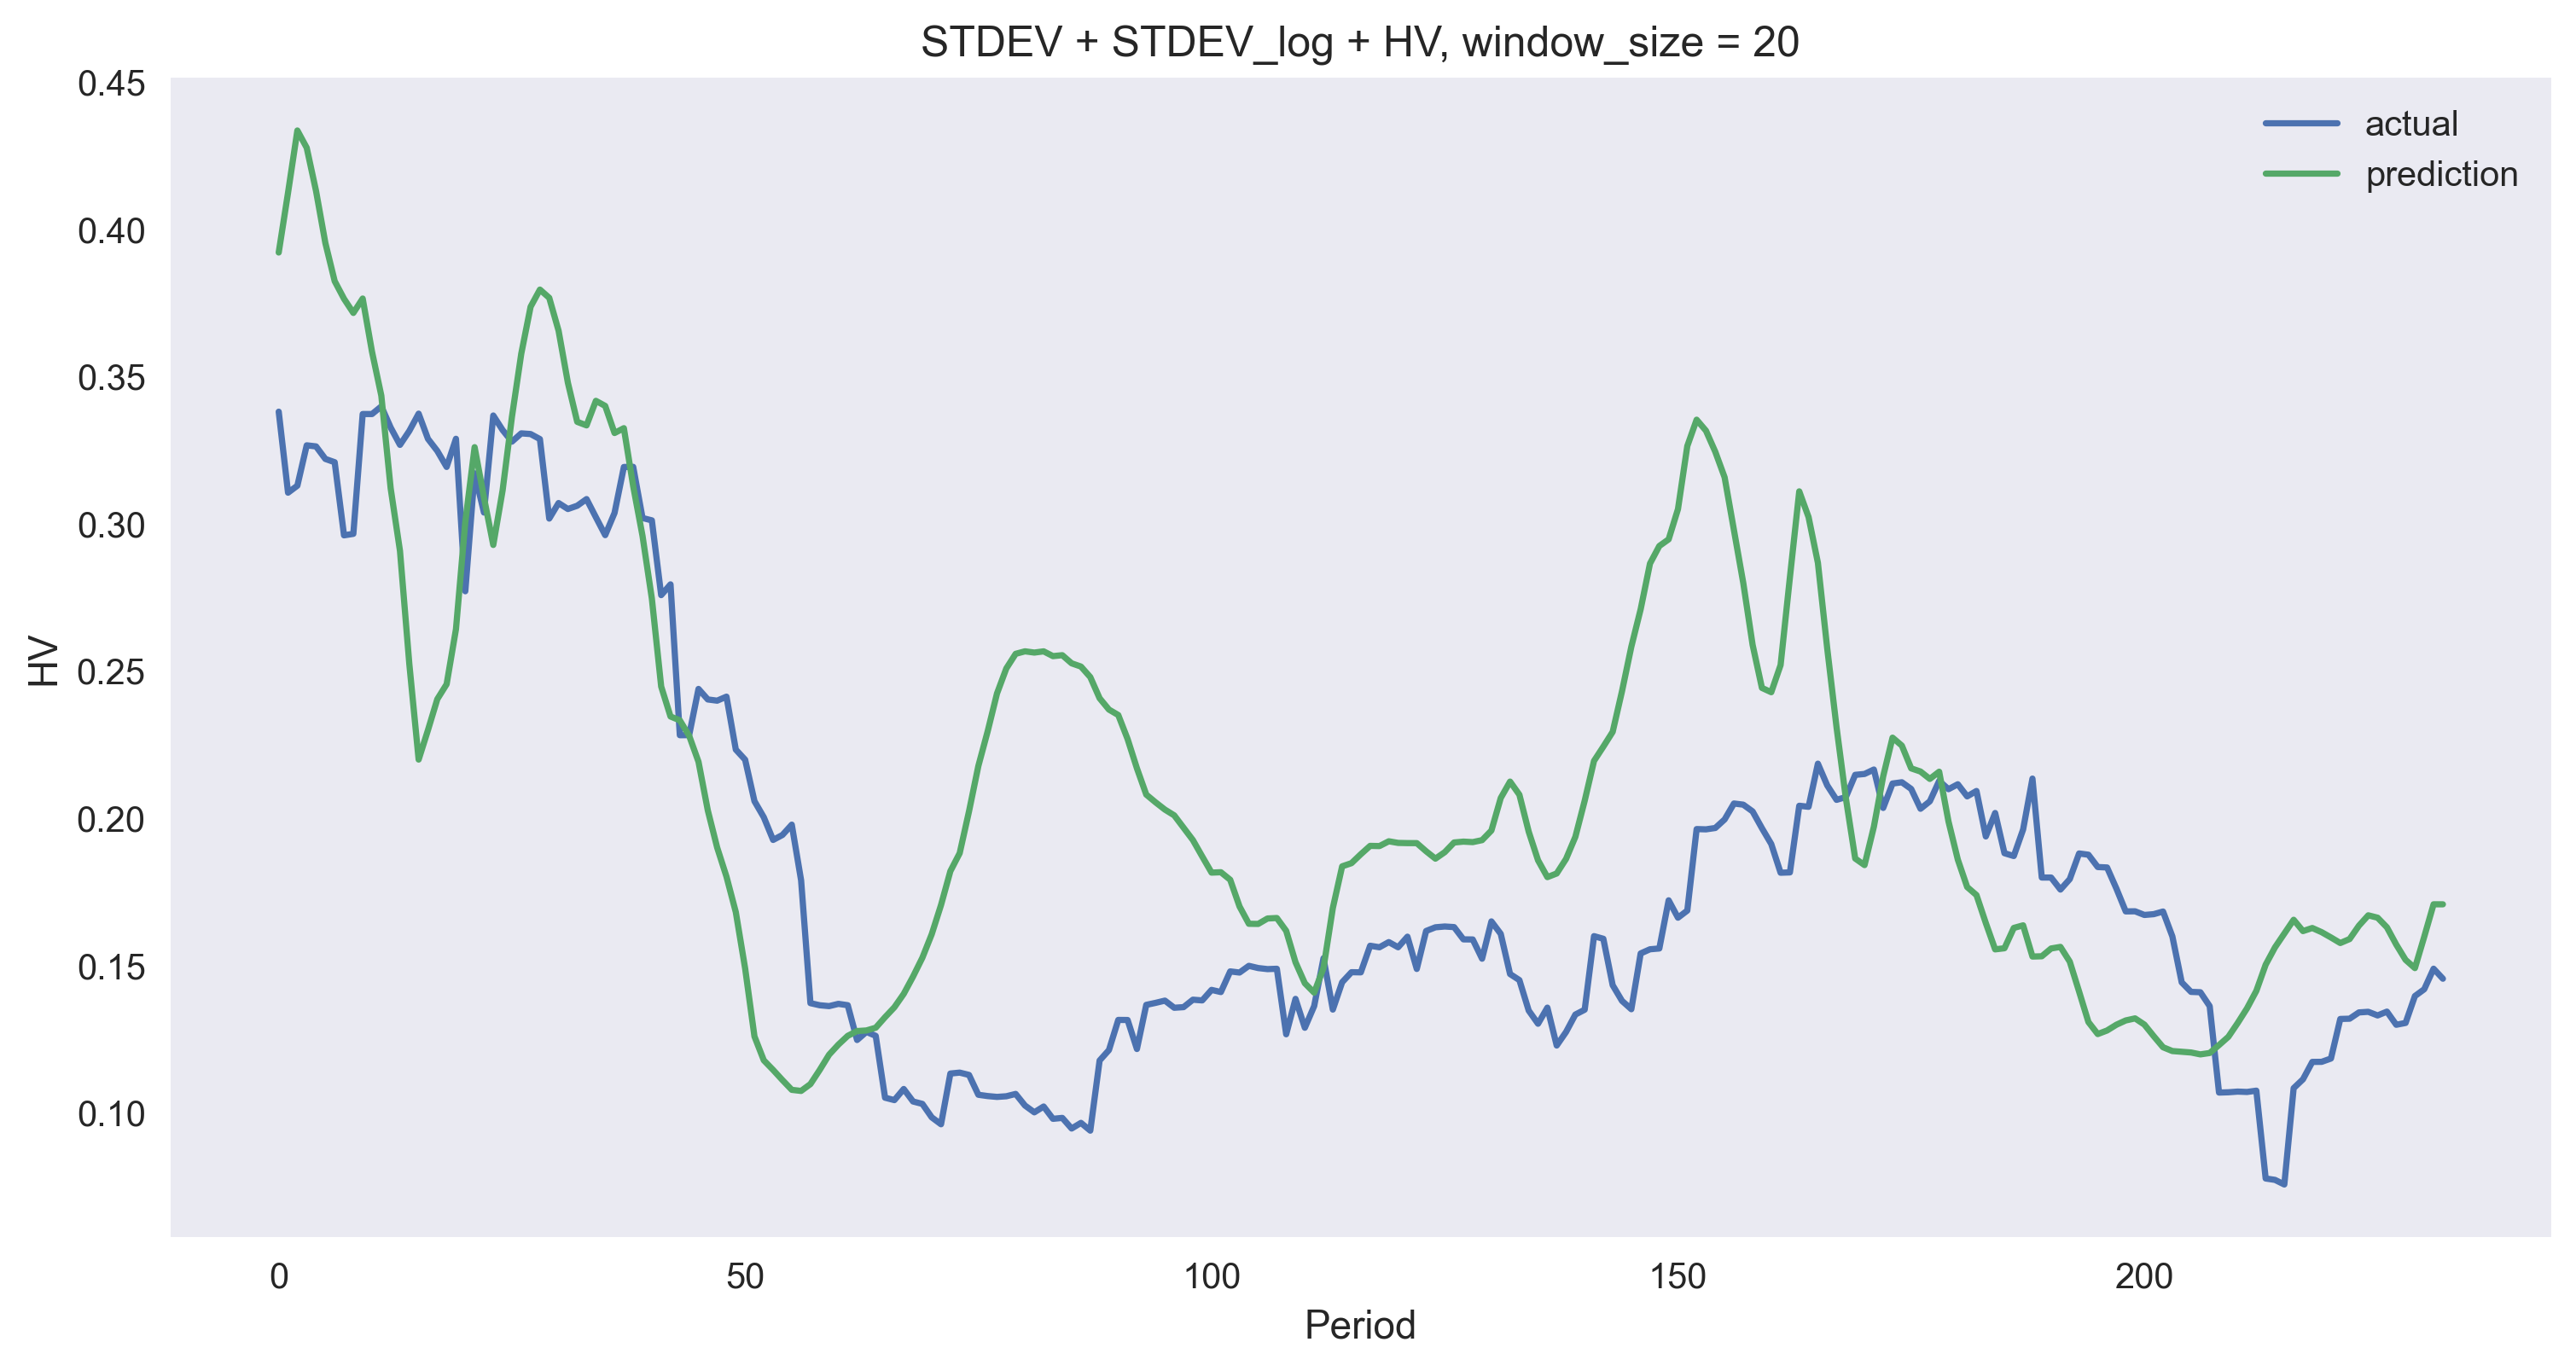

In [331]:
plt.figure(figsize = (12,6))
plt.title('STDEV + STDEV_log + HV, window_size = 20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()